In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

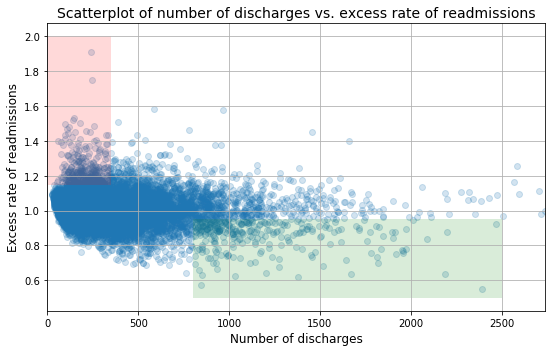

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()
plt.show()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

# Analysis of report
**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

There seems to be a lot of data not accounted for when creating this observation. From a cursory glance, the average rate of readmissions looks to be constant regardless of the number of discharges. A lot of scatter points seem to be random and the correlation does not seem to be large for the two variables. I will analyze this further below by plotting a linear regression plot along with the pearson correlation values. This will give us a best fit line to our data to determine a trend between the two variables.

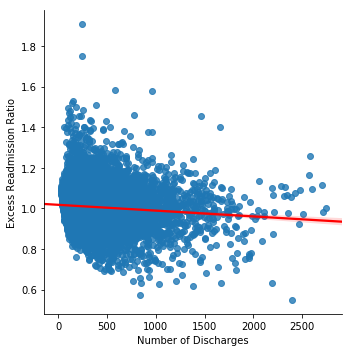

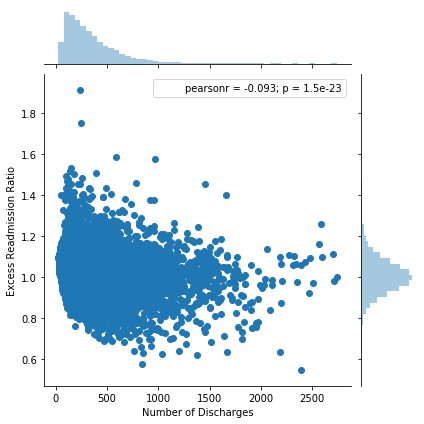

From the figures shown, the rate of readmissions certainly trending down with increasing number of discharges.
The correlation -0.09309554287590441 between the two variables is very low but the p-value 1.5022756426464526e-23 is less 0.05 so the correlation is statistically significant.


In [5]:
# Plot a best-fit line with the same set of data 
sns.lmplot('Number of Discharges','Excess Readmission Ratio',clean_hospital_read_df.iloc[81:-3],line_kws={'color': 'red'})
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=clean_hospital_read_df[81:-3])
plt.show()
print('From the figures shown, the rate of readmissions certainly trending down with increasing number of discharges.')

# Calculate pearson correlation coefficents
correlation_val = scipy.stats.pearsonr(x,y)
print(f'The correlation {correlation_val[0]} between the two variables is very low\
 but the p-value {correlation_val[1]} is less 0.05 so the correlation is statistically significant.')

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

The only way to prove or disprove this is by going straight into the numbers and testing if our conclusions match the reports.

In [6]:
# Create the dataframe from the less than case
less_df = clean_hospital_read_df[clean_hospital_read_df["Number of Discharges"]<100]
mean_less_discharge = np.mean(less_df["Excess Readmission Ratio"])
percentage_less_discharge = np.sum(less_df["Excess Readmission Ratio"] > 1)/less_df.count()['Excess Readmission Ratio']
print(f"In hospitals/facilities with number of discharges < 100 (n={less_df.count()['Excess Readmission Ratio']}),\
 mean excess readmission rate is {round(mean_less_discharge,3)} and {round(percentage_less_discharge,2)}%\
 have excess readmission rate greater than 1")


greater_df = clean_hospital_read_df[clean_hospital_read_df["Number of Discharges"]>1000]
mean_greater_discharge = np.mean(greater_df["Excess Readmission Ratio"])
percentage_greater_discharge = np.sum(greater_df["Excess Readmission Ratio"] > 1)/greater_df.count()['Excess Readmission Ratio']
print(f"\nIn hospitals/facilities with number of discharges > 1000 (n={greater_df.count()['Excess Readmission Ratio']}),\
 mean excess readmission rate is {round(mean_greater_discharge,3)} and {round(percentage_greater_discharge,2)}%\
 have excess readmission rate greater than 1")

print("\nBoth of my conclusions match the report's statistics.")

In hospitals/facilities with number of discharges < 100 (n=1188), mean excess readmission rate is 1.023 and 0.63% have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000 (n=463), mean excess readmission rate is 0.978 and 0.44% have excess readmission rate greater than 1

Both of my conclusions match the report's statistics.


**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

The first point has been already proven false as the correlation between the two variables is very low. I will take a look deeper at the statistics to see if the values given are practical or not. Also why does the policy recommendations geared towards hospitals with less than 300 capacity because that seems quite irrelevant to the analysis.

The biggest problem is that that the analysis going from a small hospital (one that has less discharges is assumed to be small in this study) will only return a benefit of 0.045 decrease in excess readmission rate on average. Let me do a simple analysis of the number of hospitals with excess readmission rates greater than 1.045 for the hospitals this policy is targeted at.

In [7]:
# Create the dataframe from the less than case
diff_discharge = np.sum(less_df["Excess Readmission Ratio"] > 1.045)/np.sum(less_df["Excess Readmission Ratio"] > 1)
print(f'Hospitals that will still fail the excess readmission rate ({np.sum(less_df["Excess Readmission Ratio"] > 1.045)})\
 out of the hospitals that are currently failing the test ({np.sum(less_df["Excess Readmission Ratio"] > 1)})\
 which is ~{int(diff_discharge*100)}% of the hospitals that are failing.')
print(f'\nThis means ~{int(diff_discharge*100)}% of the failing hospitals can follow the policy recommendations\
 and still end up failing for having excess readmission rates')

Hospitals that will still fail the excess readmission rate (338) out of the hospitals that are currently failing the test (751) which is ~45% of the hospitals that are failing.

This means ~45% of the failing hospitals can follow the policy recommendations and still end up failing for having excess readmission rates
